# Non-Uniform Quantization with $\mu$-law Companders

This code is provided as supplementary material of the lecture Quellencodierung.

This code illustrates
* Non-uniform quantization using the $\mu$-law characteristic

In [1]:
import numpy as np
import shutil
import matplotlib.pyplot as plt

These functions implement the $\mu$-law and inverse $\mu$-law characteristic
$$
g_{\mu}(x) = \mathrm{sign}(x)\frac{\ln(1+\mu|x|)}{\ln(1+\mu)}
$$
and the inverse
$$
g^{-1}_{\mu}(y) = \mathrm{sign}(y)\frac{1}{\mu}\left((1+\mu)^{|y|}-1\right)
$$

In [2]:
def uLaw(x):
    mu = 255
    y = np.array([np.sign(t)*np.log(1+mu*np.abs(t))/np.log(1+mu) for t in x])
    return y

def uLaw_inv(y):
    mu = 255
    x = np.array([np.sign(t)/mu*((1+mu)**(np.abs(t))-1) for t in y])
    return x

In [3]:
x = np.linspace(-1,1,1000)
y = uLaw(x)

w = 5
Delta = 1 / (2**(w-1))
yh = np.sign(y)*Delta*(np.floor(np.abs(y)/Delta)+0.5) 
xh = uLaw_inv(yh)

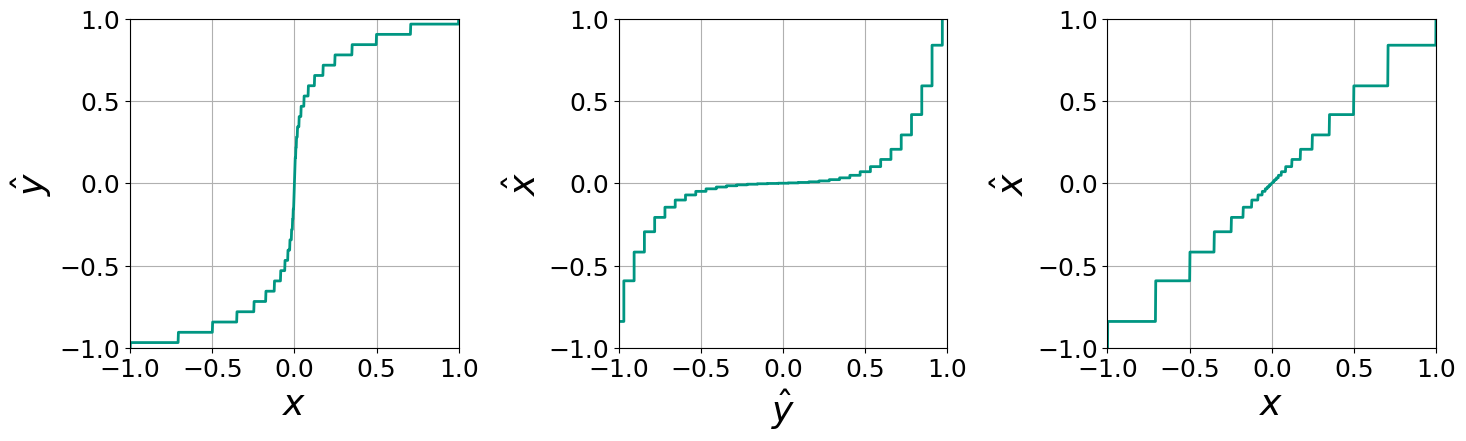

In [4]:
# plotting options 
font = {'size'   : 18}
plt.rc('font', **font)
plt.rc('text', usetex=True if shutil.which('latex') else False)

plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
plt.plot(x,yh, linewidth=2,c=(0,0.59,0.51))
plt.xlim((-1,1))
plt.ylim((-1,1))
plt.gca().set_aspect('equal', 'box')
plt.gca().set_xticks([-1,-0.5,0,0.5,1])
plt.gca().set_yticks([-1,-0.5,0,0.5,1])
plt.grid(True)
plt.xlabel('$x$',fontsize=26)
plt.ylabel('$\hat{y}$',fontsize=26)

plt.subplot(1,3,2)
plt.step(yh,xh, linewidth=2,c=(0,0.59,0.51))
plt.xlim((-1,1))
plt.ylim((-1,1))
plt.gca().set_aspect('equal', 'box')
plt.gca().set_xticks([-1,-0.5,0,0.5,1])
plt.gca().set_yticks([-1,-0.5,0,0.5,1])
plt.grid(True)
plt.xlabel('$\hat{y}$',fontsize=26)
plt.ylabel('$\hat{x}$',fontsize=26)

plt.subplot(1,3,3)
plt.plot(x,xh, linewidth=2,c=(0,0.59,0.51))
plt.xlim((-1,1))
plt.ylim((-1,1))
plt.gca().set_aspect('equal', 'box')
plt.gca().set_xticks([-1,-0.5,0,0.5,1])
plt.gca().set_yticks([-1,-0.5,0,0.5,1])
plt.grid(True)
plt.xlabel('$x$',fontsize=26)
plt.ylabel('$\hat{x}$',fontsize=26)

plt.tight_layout()
#plt.savefig('figure_DST_7.6_w%d.pdf' % w,bbox_inches='tight')